# COVID19-TWEETS:EDA + SENTIMENTAL ANALYSIS FOR MALAWI

<h3 style = "font-family: cursive;background-color:#ff99cc	">INTRODUCTION </h3>
 
- The COVID-19 outbreak has brought significant attention to the healthcare sector in recent times, and it has changed the concept of safety in every aspect of our lives. Social distancing is an effective method for reducing the spread of coronavirus. Safety measures such as wearing masks, washing hands regularly, and staying careful regarding intimacy 

<h3 style = "font-family: cursive;background-color:#ff99cc	"> Problem Statement</h3>

- The main aim is to understand the diverse sentiments of people regarding the covid19 and to analyze the impact of positive, negative, sentimental and neutral tweets on social media regarding COVID-19.

In [3]:
# load the packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import re
import plotly.express as px
import neattext as ntx
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('wordnet')

<h3 style = "font-family: cursive;background-color:#ff99cc	">Loading and Checking the dataset: </h3>

In [4]:
from google.colab import files

In [5]:
uploaded= files.upload()

Saving Covid19tweets1_malawi.csv to Covid19tweets1_malawi.csv


In [6]:
# load the dataset
path='Covid19tweets1_malawi.csv'
data= pd.read_csv(path)

In [7]:
#check the dataset columns
print(data.columns)

Index(['Datetime', 'Tweet Id', 'Tweet', 'Username', 'username description',
       'User followers,', 'user Location', 'User_friends', 'User_verified',
       'source', 'replyCount', 'retweetCount', 'likeCount', 'retweetedTweet',
       'mentionedUsers', 'hashtags'],
      dtype='object')


In [8]:
# display the dimesions of the dataset
data.shape 

(16192, 16)

**Observation**
    
    The dataset has 228207 rows and 16 attributes

In [9]:
# display the dataset info.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16192 entries, 0 to 16191
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Datetime              16192 non-null  object 
 1   Tweet Id              16192 non-null  int64  
 2   Tweet                 16192 non-null  object 
 3   Username              16192 non-null  object 
 4   username description  14764 non-null  object 
 5   User followers,       16192 non-null  int64  
 6   user Location         13357 non-null  object 
 7   User_friends          16192 non-null  int64  
 8   User_verified         16192 non-null  bool   
 9   source                16192 non-null  object 
 10  replyCount            16192 non-null  int64  
 11  retweetCount          16192 non-null  int64  
 12  likeCount             16192 non-null  int64  
 13  retweetedTweet        0 non-null      float64
 14  mentionedUsers        4110 non-null   object 
 15  hashtags           

In [10]:
# display the dataset
data.head(4)

,Datetime,Tweet Id,Tweet,Username,username description,"User followers,",user Location,User_friends,User_verified,source,replyCount,retweetCount,likeCount,retweetedTweet,mentionedUsers,hashtags
0,2022-05-08 15:22:38+00:00,1523322492059799552,"Just published a paper today! 🥳 In this study,...",paulkawale,Teacher,601,"Lilongwe, Malawi",529,False,Twitter for iPhone,0,2,8,NaN,NaN,['Malawi']
1,2022-05-08 08:21:26+00:00,1523216494272069632,Two African countries decided to staunchly cha...,drnathimdladla,Former Chief of ICU at Dr George Mukhari Acade...,6634,South Africa,45,False,Twitter for iPhone,5,70,172,NaN,NaN,NaN
2,2022-05-07 15:07:00+00:00,1522956167885991939,📢 Recent PREPARE survey data release by @CGDev...,ContactPARIS21,Global partnership promoting the better use & ...,27258,"Paris, France",1009,False,Twitter Web App,0,0,0,NaN,"[User(username='CGDev', id=12594872, displayna...",NaN
3,2022-05-07 08:54:35+00:00,1522862447484411905,COVID-19 Surveillance Assistants – Various Dis...,SouthernAfrJobs,Discover Latest Jobs in the Southern Africa Re...,156,"Blantyre, Malawi",394,False,WordPress.com,0,0,0,NaN,NaN,NaN


In [11]:
data.tail(4)

,Datetime,Tweet Id,Tweet,Username,username description,"User followers,",user Location,User_friends,User_verified,source,replyCount,retweetCount,likeCount,retweetedTweet,mentionedUsers,hashtags
16188,2020-03-03 10:06:33+00:00,1234782204749807618,This is good. It would be interesting to know ...,EdythK,'...We can only be human together.'--Desmond Tutu,7800,"Blantyre, Malawi",2241,False,Twitter for Android,3,5,15,NaN,NaN,['Covid_19']
16189,2020-03-03 06:46:49+00:00,1234731942094032896,Wow! \n\n#Malawi is helping #China in the figh...,danbanik,Professor of political science @UniOslo @sum_u...,13196,"Oslo, Norway",335,False,Twitter for iPhone,1,3,12,NaN,NaN,"['Malawi', 'China', 'Covid_19']"
16190,2020-03-02 09:17:36+00:00,1234407497773043719,"The Dutch Embassy in Zimbabwe, Zambia and Mala...",NLinZimbabwe,"We are the NL embassy to Zimbabwe, Zambia & Ma...",70604,"Harare, Zimbabwe",569,True,Twitter Web App,0,5,5,NaN,NaN,NaN
16191,2020-02-27 15:57:54+00:00,1233058685879906304,Y yo me pregunto: que pasaría si la Covid - 19...,marscascado,"Comunicadora, soñadora, periodista, viajera y ...",130,Hong Kong,1088,False,Twitter for iPhone,0,0,0,NaN,"[User(username='WHO', id=14499829, displayname...","['COVIDー19', 'diseases']"


<h3 style = "font-family: cursive;background-color:#ff99cc	">3.Data Cleaning And Analysis: </h3>

In [12]:
#Checking the duplicates
data=data.drop_duplicates('Tweet')
# drop the duplicates 
dup=data.duplicated().sum()
print('Any Duplicate Value:',dup)

Any Duplicate Value: 0


In [13]:
#checking for missing values 
data.isna().sum()

Datetime                    0
Tweet Id                    0
Tweet                       0
Username                    0
username description     1395
User followers,             0
user Location            2764
User_friends                0
User_verified               0
source                      0
replyCount                  0
retweetCount                0
likeCount                   0
retweetedTweet          16024
mentionedUsers          11959
hashtags                 9478
dtype: int64

**Observations**

    We can see that there is a lot of missing data in user_location, description,sources

In [14]:
# dropping unnecessary  columns 
data.drop(columns={"Tweet Id","username description","User followers,",
                   "User_friends","hashtags","retweetCount","likeCount","retweetedTweet",
                   "mentionedUsers",'replyCount'},inplace=True)

In [15]:
data.head(4)

,Datetime,Tweet,Username,user Location,User_verified,source
0,2022-05-08 15:22:38+00:00,"Just published a paper today! 🥳 In this study,...",paulkawale,"Lilongwe, Malawi",False,Twitter for iPhone
1,2022-05-08 08:21:26+00:00,Two African countries decided to staunchly cha...,drnathimdladla,South Africa,False,Twitter for iPhone
2,2022-05-07 15:07:00+00:00,📢 Recent PREPARE survey data release by @CGDev...,ContactPARIS21,"Paris, France",False,Twitter Web App
3,2022-05-07 08:54:35+00:00,COVID-19 Surveillance Assistants – Various Dis...,SouthernAfrJobs,"Blantyre, Malawi",False,WordPress.com


In [16]:
#converting date column to date format
data['Datetime'] = pd.to_datetime(data['Datetime']).dt.date 
#Cleaning the Dataset from Hashtags, Links, Redundant Letters, 
data['Tweet']=data['Tweet'].apply(ntx.remove_hashtags)
data['Tweet']=data['Tweet'].apply(ntx.remove_urls)
data['Tweet']=data['Tweet'].apply(ntx.remove_userhandles)
data['Tweet']=data['Tweet'].apply(ntx.remove_multiple_spaces)
data['Tweet']=data['Tweet'].apply(ntx.remove_special_characters)

In [17]:
data.head()

,Datetime,Tweet,Username,user Location,User_verified,source
0,2022-05-08,Just published a paper today In this study po...,paulkawale,"Lilongwe, Malawi",False,Twitter for iPhone
1,2022-05-08,Two African countries decided to staunchly cha...,drnathimdladla,South Africa,False,Twitter for iPhone
2,2022-05-07,Recent PREPARE survey data release by 1 Data ...,ContactPARIS21,"Paris, France",False,Twitter Web App
3,2022-05-07,COVID19 Surveillance Assistants Various Distr...,SouthernAfrJobs,"Blantyre, Malawi",False,WordPress.com
4,2022-05-07,COVID19 Surveillance Assistants,malawi_jobs,"Blantyre, Malawi.",False,WordPress.com


<h2 style = "font-family: cursive;background-color:#ff99cc"> Data
Visualisation </h2>

### Visualizing User Location

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 127482 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 127480 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 127482 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 127480 missing from current font.



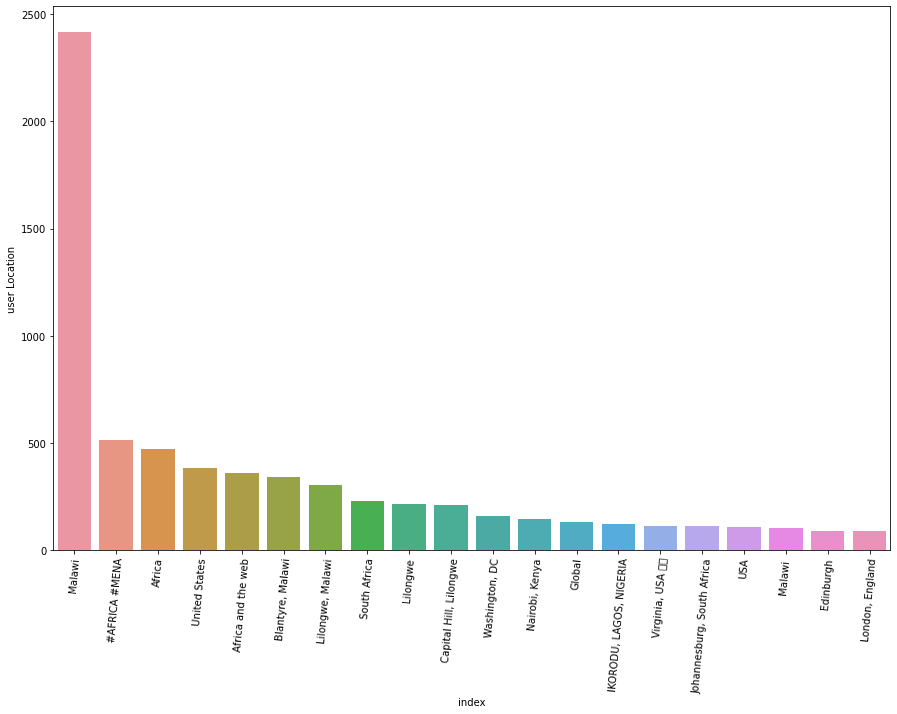

In [61]:
# Visulizing Tweet Count vs Location  
plt.figure(figsize=(15,10))
location_serie = data['user Location']
df = location_serie.value_counts(dropna=True).nlargest(20).reset_index()
sns.barplot(data = df,x="index",y='user Location')
plt.xticks(rotation = 85)
plt.show()

### Visulizing Tweet-Platform

In [19]:
data.source.value_counts()

Twitter Web App        4223
Twitter for Android    4000
Twitter for iPhone     1333
WordPress.com          1293
TweetDeck               631
                       ... 
americanpolicynews        1
GenadaMedia               1
covid19worldstats         1
trackntracer              1
Constant Contact          1
Name: source, Length: 282, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

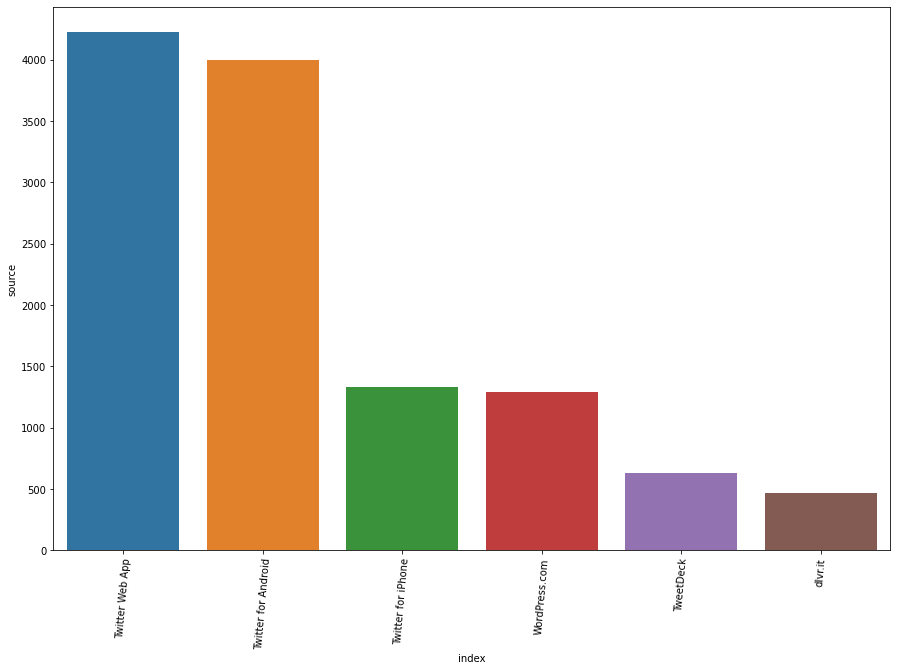

In [57]:
#Visualizing Tweet Platform-wise Distribution 
plt.figure(figsize=(15,10))
df=data['source'].value_counts().nlargest(6).reset_index()
sns.barplot(data = df,x="index",y='source')
plt.xticks(rotation = 85)
#add tittle and delete covid19 of words#

### Assigning Polarity & Subjectivity to tweets 

In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [23]:
#stopwords are the words which won't bring about any changes to the polarity of the tweet
stop_words = stopwords.words('english')   
len(stop_words),stop_words[5:10]

(179, ['our', 'ours', 'ourselves', 'you', "you're"])

In [24]:
# function to remove stopwords
def stopWords(tweet):
  clean_tweet = tweet
  clean_tweet = " ".join(word for word in clean_tweet.split() if word not in stop_words)
# clean_tweet = " ".join(lemmatizer.lemmatize(word) for word in clean_tweet.split())
  return clean_tweet

In [25]:
data['Tweet'] = data['Tweet'].apply(lambda x: stopWords(x))

In [26]:
data.head(6)

,Datetime,Tweet,Username,user Location,User_verified,source
0,2022-05-08,Just published paper today In study policymake...,paulkawale,"Lilongwe, Malawi",False,Twitter for iPhone
1,2022-05-08,Two African countries decided staunchly challe...,drnathimdladla,South Africa,False,Twitter for iPhone
2,2022-05-07,Recent PREPARE survey data release 1 Data cove...,ContactPARIS21,"Paris, France",False,Twitter Web App
3,2022-05-07,COVID19 Surveillance Assistants Various Distri...,SouthernAfrJobs,"Blantyre, Malawi",False,WordPress.com
4,2022-05-07,COVID19 Surveillance Assistants,malawi_jobs,"Blantyre, Malawi.",False,WordPress.com
5,2022-05-07,SA 50 cases Covid19 reported 24 hours via Malawi,KaihatsuMalawi,Malawi,False,Twitter for Android


In [27]:
# Function to assign polarity and subjectivity to the tweets
def blob_fun(Tweet):
  senti = TextBlob(Tweet)
  senti_polarity = senti.sentiment.polarity
  senti_subjectivity = senti.sentiment.subjectivity

  if senti_polarity > 0:
    res = 'Positive'

  elif senti_polarity < 0:
    res = 'Negative'

  elif senti_polarity == 0:
    res ="Neutral"

  result = {'polarity':senti_polarity,'subjectivity':senti_subjectivity,'sentiment':res}

  return result

In [28]:
blob_fun(data['Tweet'][5])

{'polarity': 0.0, 'sentiment': 'Neutral', 'subjectivity': 0.0}

In [29]:
# but this isn't always right as shown in the example below
blob_fun('thank god,i tested negative for covid')

{'polarity': -0.3, 'sentiment': 'Negative', 'subjectivity': 0.4}

In [30]:
data['results'] = data['Tweet'].apply(blob_fun)
data.head(5)

,Datetime,Tweet,Username,user Location,User_verified,source,results
0,2022-05-08,Just published paper today In study policymake...,paulkawale,"Lilongwe, Malawi",False,Twitter for iPhone,"{'polarity': 0.35, 'subjectivity': 0.55, 'sent..."
1,2022-05-08,Two African countries decided staunchly challe...,drnathimdladla,South Africa,False,Twitter for iPhone,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim..."
2,2022-05-07,Recent PREPARE survey data release 1 Data cove...,ContactPARIS21,"Paris, France",False,Twitter Web App,"{'polarity': 0.125, 'subjectivity': 0.29166666..."
3,2022-05-07,COVID19 Surveillance Assistants Various Distri...,SouthernAfrJobs,"Blantyre, Malawi",False,WordPress.com,"{'polarity': 0.0, 'subjectivity': 0.5, 'sentim..."
4,2022-05-07,COVID19 Surveillance Assistants,malawi_jobs,"Blantyre, Malawi.",False,WordPress.com,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim..."


In [31]:
data = data.join(pd.json_normalize(data=data['results']))

In [32]:
data.head()

,Datetime,Tweet,Username,user Location,User_verified,source,results,polarity,subjectivity,sentiment
0,2022-05-08,Just published paper today In study policymake...,paulkawale,"Lilongwe, Malawi",False,Twitter for iPhone,"{'polarity': 0.35, 'subjectivity': 0.55, 'sent...",0.350,0.550000,Positive
1,2022-05-08,Two African countries decided staunchly challe...,drnathimdladla,South Africa,False,Twitter for iPhone,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000,0.000000,Neutral
2,2022-05-07,Recent PREPARE survey data release 1 Data cove...,ContactPARIS21,"Paris, France",False,Twitter Web App,"{'polarity': 0.125, 'subjectivity': 0.29166666...",0.125,0.291667,Positive
3,2022-05-07,COVID19 Surveillance Assistants Various Distri...,SouthernAfrJobs,"Blantyre, Malawi",False,WordPress.com,"{'polarity': 0.0, 'subjectivity': 0.5, 'sentim...",0.000,0.500000,Neutral
4,2022-05-07,COVID19 Surveillance Assistants,malawi_jobs,"Blantyre, Malawi.",False,WordPress.com,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000,0.000000,Neutral


In [33]:
# categorized tweets in seperate Series
positive_tweet =  data[data['sentiment'] == 'Positive']['Tweet']
negative_tweet =  data[data['sentiment'] == 'Negative']['Tweet']
neutral_tweet =  data[data['sentiment'] == 'Neutral']['Tweet']

In [34]:
from wordcloud import WordCloud
# Function for creating WordClouds
def cloud_of_Words(tweet_cat,title):
    forcloud = ' '.join([tweet for tweet in tweet_cat])
    wordcloud = WordCloud(width =500,height = 300,random_state =5,max_font_size=110).generate(forcloud)
    plt.imshow(wordcloud, interpolation ='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()
    plt.figure(figsize = (10,8))

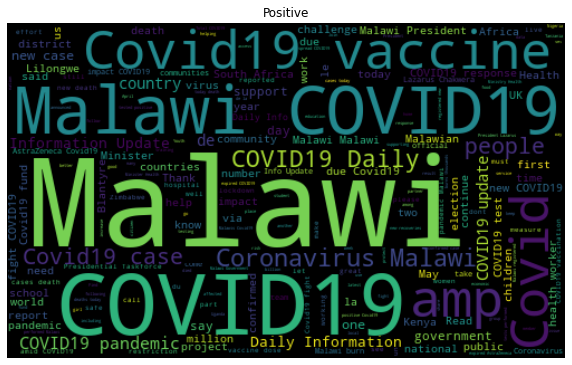

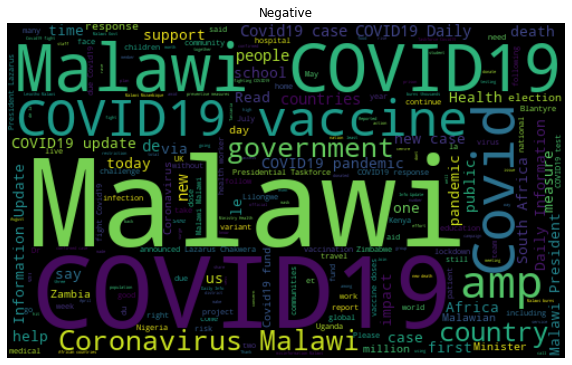

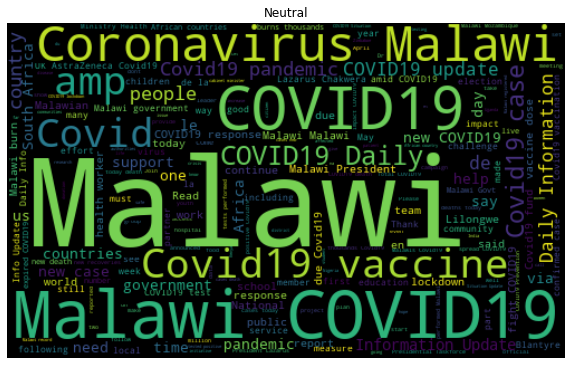

<Figure size 720x576 with 0 Axes>

In [35]:
plt.figure(figsize = (10,8))
# Creating wordclouds for positive, negative, neutral tweets
cloud_of_Words(positive_tweet, 'Positive')
cloud_of_Words(negative_tweet, 'Negative')
cloud_of_Words(neutral_tweet, 'Neutral')

**Observation**
- The above three wordclouds have the similar words as expected because our main analysis is Covid19 in Malawi

In [36]:
# Breaking down the tweets into words in seperate categories
positive_tokens = [token for line in positive_tweet for token in line.split()]
negative_tokens = [token for line in negative_tweet for token in line.split()]
neutral_tokens = [token for line in neutral_tweet for token in line.split()]

In [37]:
# to get most used words
def get_maxtoken(tweets,num=30):
  word_tokens = Counter(tweets)
  max_common = word_tokens.most_common(num)
  return dict(max_common)

In [38]:
def token_df_vis(x, title):
  df = pd.DataFrame(get_maxtoken(x).items(),columns=['words','count'])
  # plt.figure(figsize = (20,5))
  # plt.title(title)
  # plt.xticks(rotation=45)
  fig = px.bar(df,x='words',y='count',title = title)
  fig.show()

In [39]:
token_df_vis(positive_tokens,'Positive')
token_df_vis(negative_tokens,'Negative')
token_df_vis(neutral_tokens,'Neutral')

In [40]:
def percent(x,y):
  return print("Percentage of "+y+" tweets :",round(len(x)/data.shape[0]*100,3),"%")

In [41]:
percent(positive_tweet, 'positive')
percent(negative_tweet, 'negative')
percent(neutral_tweet, 'neutral')

Percentage of positive tweets : 36.339 %
Percentage of negative tweets : 12.968 %
Percentage of neutral tweets : 49.651 %


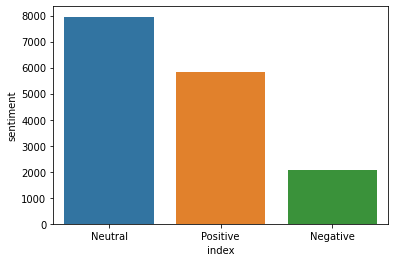

In [54]:
import seaborn as sns
df=data['sentiment'].value_counts().reset_index()
sns.barplot(x = 'index', y = 'sentiment', data = df)

**Observation**

 Based on tweets, most people maintain a positive attitude to COVID-19, some people have neutral reactions, and there are relatively less people who have a negative reaction to COVID-19.
